# Equation de la chaleur

In [160]:
import numpy as np
import numpy.linalg as npl
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.sparse as scs
from math import sqrt
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
import scipy.sparse.linalg as scsl

On considère l'équation de la chaleur

$$\partial_{t}u(t,x)=\mu\partial_{xx}u(t,x),~~\forall t>0,~\forall x\in ]0,1[$$

avec les conditions aux limites de Dirichlet homogènes et une condition initiale notée $u_0$.

In [4]:
# Explicit Euler :

def Euler_Exp(dt,dx,U0,Tinit,Tend,mu):
    N = int((Tend-Tinit)/dt)
    U = np.zeros((len(U0),N))
    U[:,0] = U0
    Utmp = U0.copy()
    boundaries = np.ones_like(U0,dtype=bool)
    boundaries[0] = False
    boundaries[-1] = False 
    for i in range(N):
        U[:,i]=U0 + mu*(dt/dx**2)*(np.roll(U0,+1) + np.roll(U0,-1) - 2*U0)
        U[0,i]=0
        U[len(U0)-1,i]=0
        U0=U[:,i]
    return np.array(U)

In [5]:
# Implicit Euler :

def Euler_Imp(dt,dx,U0,Tinit,Tend,mu):
    N = int(T/dt)
    X=int(L/dx)
    U = np.zeros((len(U0),N))
    U[:,0] = U0
    c = dt/(dx*dx)   
    A = np.zeros((X,X))
    I = np.identity(X)
    A[0,0] = A[X-1,X-1] = mu*2/(dx*dx)
    for i in range(1,X-1):
        A[i,i]= mu*2/(dx*dx)
        A[i,i-1] = A[i,i+1]= -mu/(dx*dx)
    Ainv = npl.inv(A*dt+I)
    for i in range(N-1):
        U[:,i+1] = np.dot(Ainv,U[:,i])
    return U

In [12]:
# Theta-scheme :

def Theta(dt,dx,U0,Tinit,Tend,mu,theta):
    N = int((Tend-Tinit)/dt)
    X = len(U0)
    U = np.zeros((X,N))
    U[:,0] = U0
    c = dt/(dx*dx)
    A = np.zeros((X,X))
    I = np.identity(X)
    A[0,0] = A[X-1,X-1] = mu*2/(dx*dx)
    for i in range(1,X-1):
        A[i,i]= mu*2/(dx*dx)
        A[i,i-1] = A[i,i+1]= -mu/(dx*dx)
    Ainv = npl.inv(I + dt*A*(1-theta))
    interm = np.zeros(X)
    for i in range(N-1):
        M = np.dot((I-dt*theta*A),Ainv)
        U[0,i] = 0
        U[X-1,i] = 0
        U[:,i+1] = np.dot(U[:,i],M)
    return U


# Définition des schémas d'Euler à partir du theta-schéma

def Euler_Imp(dt,dx,U0,Tinit,Tend,mu):
    return Theta(dt,dx,U0,Tinit,Tend,mu, theta=0)

def Euler_Exp(dt,dx,U0,Tinit,Tend,mu):
    return Theta(dt,dx,U0,Tinit,Tend,mu, theta=1)

In [32]:
Tinit  = 0                                      #init
T      = 0.3                                    #end
L      = 1                                      #space length
dt     = 0.00002                                #time step
dx     = 0.010                                  #space step
mu     = 0.3                                    #viscosité
theta  = 1/2                                    #theta
temps  = np.linspace(Tinit,T,int((T-Tinit)/dt)) #time-vector
NT     = len(temps)                             #time-vector size
espace = np.linspace(0,1,int(L/dx))             #space

scheme = 3   #1:Euler_Exp, 2:Euler_Imp, 3:Theta
cinit  = 2   #1:sinus, 2:créneau

if cinit == 1:    #sinus
    U0 = np.sin(np.pi * espace)
elif cinit == 2:  #créneau
    X = len(espace)
    U0 = np.zeros(X, dtype=float)
    U0[round(X/2 - sqrt(X/2)):round(X/2 + sqrt(X/2))] = 1.


if scheme == 2:
    U = Euler_Imp(dt,dx,U0,Tinit,T,mu) 
    
elif scheme in [1, 3]:
    if mu * (dt/dx) > 1:
        print("CFL condition !")
    else:        
        U = Theta(dt,dx,U0,Tinit,T,mu,theta)
        
else:
    print("Wrong scheme number ! Choose a number between 1 and 3")

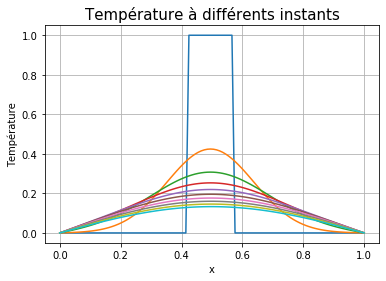

In [28]:
for i in range(10):
    t = NT * i // 10
    plt.plot(espace,U[:,t])#label="Instant {}".format(temps[t]))
    
plt.grid()
plt.title("Température à différents instants",fontsize = 15)
plt.ylabel("Température")
plt.xlabel("x")
plt.show()

KeyboardInterrupt: 

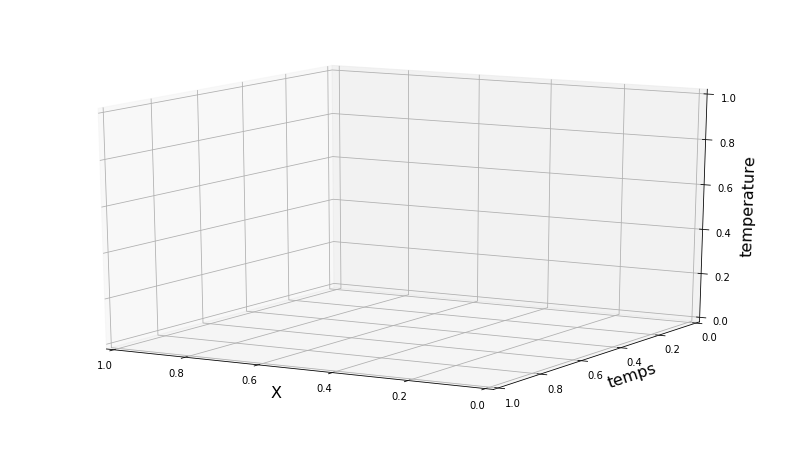

In [15]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('temperature', fontsize = 16)
ax.view_init(elev=15, azim = 120)

[SX,ST]=np.meshgrid(espace,temps)
a = ax.plot_surface(SX,ST,U.T,cstride=1,linewidth=0,cmap='jet')
plt.title("Température (vue en 3D)",fontsize=15)
plt.colorbar(a)
plt.show()

## Recalls

## Explicit Euler

$$\frac{U_j^{n+1}-U_j^{n}}{\delta_t}=\mu\frac{U_{j-1}^n-2U_j^n+U_{j+1}^n}{\delta_x^2}$$

s.t.

$$U_j^{n+1}=U_j^{n} + \mu\frac{\delta_t}{\delta_x^2}(U_{j-1}^n-2U_j^n+U_{j+1}^n)$$

## Implicit Euler

$$\frac{U_j^{n+1}-U_j^{n}}{\delta_t}=\mu\frac{U_{j-1}^{n+1}-2U_j^{n+1}+U_{j+1}^{n+1}}{\delta_x^2}$$

## Theta-scheme

$$\frac{U_j^{n+1}-U_j^{n}}{\delta_t}=\mu(1-\theta)\frac{U_{j-1}^{n+1}-2U_j^{n+1}+U_{j+1}^{n+1}}{\delta_x^2}+\mu\theta\frac{U_{j-1}^{n}-2U_j^{n}+U_{j+1}^{n}}{\delta_x^2}$$

On se donne le problème stationnaire 1D suivant:
$$\begin{cases}
    \lambda(x) u''(x) = 0 \; , \; \forall x \in [0;1]\\
    u(0)=T_0\; , \; u(1)=0\\
\end{cases}$$.
Avec : $$\lambda(x) = \begin{cases}
        \lambda_0 \; , \; \text{si } x \in[0;\frac{1}{2}]\\
        1 \; , \; \text{si } x \in[\frac{1}{2};1]\\
\end{cases}$$.
Les paramètres de ce problème sont alors:
$$\mu = (\lambda_0, T_0) \in \mathbb{R}\times \mathbb{R}$$

# Toy problem: 1D-Stationnary-Heat for RB

In [5]:
import scipy as sp
import numpy as np
import scipy.sparse.linalg as spspl
import matplotlib.pyplot as plt

In [13]:
def second_membre_nul(x,mu):
    coucou = np.zeros(len(x))
    coucou[0] = mu[1]
    return coucou

#résolution par diff finies
def solver(n,second_membre,mu):
    # mu = [lambda_0, T_0]
    N_diff = 2**n
    x_diff_plot = sp.linspace(0,1,N_diff+2)
    x_diff = x_diff_plot[:-1]
    f_diff = second_membre(x_diff,mu)

    #construction de la matrice A en format sparse
    tab_A_0 = [np.repeat([1,0], [N_diff//2,N_diff//2], 0),
               np.repeat([0,-2,-1,0], [1,N_diff//2-1,1,N_diff//2], 0),
               np.repeat([0,1,0], [1,N_diff//2-1,N_diff//2], 0)]
    tab_A_1 = [np.repeat([0,((N_diff+2)**2)], [N_diff//2,N_diff//2],0),np.repeat([1,0,-((N_diff+2)**2),-2*((N_diff+2)**2)],[1,N_diff//2-1,1,N_diff//2],0),np.repeat([0,((N_diff+2)**2)],[N_diff//2,N_diff//2],0)]
    A_0 = sp.sparse.diags(tab_A_0,[-1,0,1],(N_diff+1,N_diff+1))*mu[0]*((N_diff+2)**2)
    A_1 = sp.sparse.diags(tab_A_1,[-1,0,1],(N_diff+1,N_diff+1))
    #NPA_0 = A_0.todense()
    #NPA_1 = A_1.todense()
    #print(NPA_0+NPA_1)
    #print(NPA_1)

    #résolution des diff finies (Au=f)
    U_diff = spspl.spsolve(A_0+A_1,f_diff)

    #préparation au plot
    U_diff_plot = sp.zeros(N_diff+2)
    U_diff_plot[:-1] = U_diff
    
    return x_diff_plot, U_diff_plot
        

In [14]:
X,U1 = solver(5,second_membre_nul,[200,50])
_,U2 = solver(5,second_membre_nul,[0.8,50])
_,U3 = solver(5,second_membre_nul,[0.1,50])

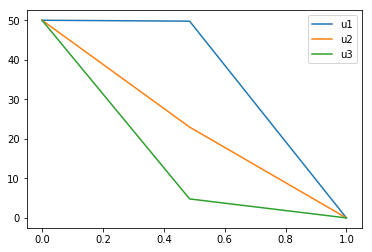

In [15]:
plt.plot(X,U1,label="u1")
plt.plot(X,U2,label="u2")
plt.plot(X,U3,label="u3")
plt.legend()
plt.show()

# Starting RB for Burger: 1D non-stationnary and parametrized Heat

In [187]:
def second_membre_chaleur_instationnaire(x,t,mu,OPTN):
    B = np.zeros(len(x))
    if OPTN == 1:
        B[0] = (np.sin(t)+1)*mu[1]+(np.cos(t)+1)*mu[2]
        B[-1] = (np.sin(t)+1)*mu[3]+(np.cos(t)+1)*mu[4]
    return B

def val_init_chaleur_instationnaire(x,mu,OPTN):
    if OPTN == 1:
        u_0 = ((np.sin(x*2*np.pi)+1)*mu[1]+(np.cos(x*2*np.pi)+1)*mu[2])*(1-x)+((np.sin(x*2*np.pi)+1)*mu[3]+(np.cos(x*2*np.pi)+1)*mu[4])*x
    else:
        u_0 = (mu[3]-mu[1]+2*(mu[4]-mu[2]))*(x)+mu[1]+2*mu[2]
    return u_0

#résolution P1 lagrange + Euler implicite
def solver_chaleur_instationnaire(n,T_diff,second_membre,val_init,mu,optn,plot = False):
    # mu = [Kappa, b0_lambda1, b0_lambda2, b1_lambda1, b1_lambda2]
    optn = 1
    N_diff = 2**n
    T = np.pi
    dt = T/T_diff
    x_diff = np.linspace(0,1,N_diff+1)
    h = 1/N_diff
    U_diff = np.zeros((N_diff+1,T_diff))
    
    #initialisation
    U_diff[:,0] = val_init(x_diff,mu,optn)
    k = 1
    
    #construction des matrice A en format, sparse
    banded_A_0_D = [np.repeat([0,h/6,0],[1,N_diff-1,1],0)/dt,
                    np.repeat([0,2/3*h,0],[1,N_diff-1,1],0)/dt]
    banded_A_1_D = [np.repeat([0,-1/h,0],[1,N_diff-1,1],0)*mu[0],
                    np.repeat([0,2/h,0],[1,N_diff-1,1],0)*mu[0]]
    banded_A_D = np.repeat([1,0,1],[1,N_diff-1,1],0)
    banded_A = np.zeros((3,N_diff+1))
    banded_A[0,1:] = banded_A_0_D[0][:-1]+banded_A_1_D[0][:-1]
    banded_A[1,:] = banded_A_0_D[1]+banded_A_1_D[1]+banded_A_D
    banded_A[2,:-1] = banded_A_0_D[0][1:]+banded_A_1_D[0][1:]
    #banded_A allows efficient solving of tridiagonal linear system
    #A_0_D is stored in diagonal to perform efficient computing of A_0 . U
    A_0_D = sp.sparse.diags([banded_A_0_D[0][1:],banded_A_0_D[1],banded_A_0_D[0][:-1]],[-1,0,1],(N_diff+1,N_diff+1))
    #boucle en temps
    while k < T_diff:
        # mise à jour du second membre
        f_diff = second_membre(x_diff,k*dt,mu,optn)
        # résolution Euler Explicite (A . u_k = f_k + A_0 . u_k-1)
        U_diff[:,k] = sp.linalg.solve_banded((1,1),banded_A,f_diff+A_0_D.dot(U_diff[:,k-1]))
        
        k += 1
    
    if plot:
        return x_diff,np.arange(T_diff)*dt,U_diff
    else:
        return U_diff

In [208]:
n = 4
T = 20
mu = (0.5,0.6,4,1,-0.2)
optn = 1
x,time,U_tab = solver_chaleur_instationnaire(n,T,second_membre_chaleur_instationnaire,val_init_chaleur_instationnaire,mu,optn,True)

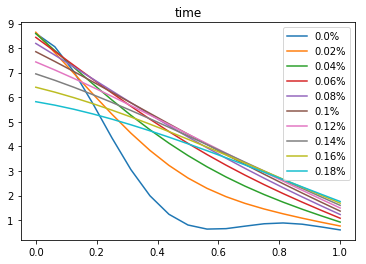

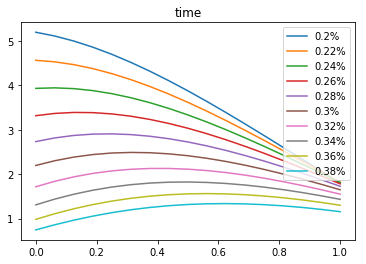

In [209]:
for i in range(len(U_tab[0,:])):
    plt.plot(x,U_tab[:,i],label=str(i/T_max)+"%")
    if (i+1)%10 == 0:
        plt.title("time")
        plt.legend()
        plt.show()

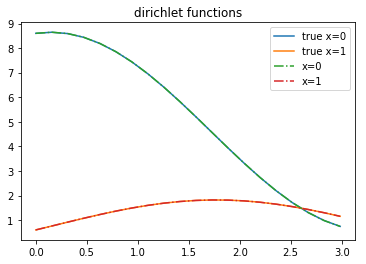

In [210]:
b0 = []
b1 = []
for t in time:
    tmp = second_membre_chaleur_instationnaire(np.zeros(2),t,mu,1)
    b0.append(tmp[0])
    b1.append(tmp[1])
plt.plot(time,b0,label = "true x=0")
plt.plot(time,b1,label = "true x=1")
plt.plot(time,U_tab[0,:],label = "x=0",linestyle = "-.")
plt.plot(time,U_tab[-1,:],label = "x=1",linestyle = "-.")
plt.legend()
plt.title("dirichlet functions")
plt.show()

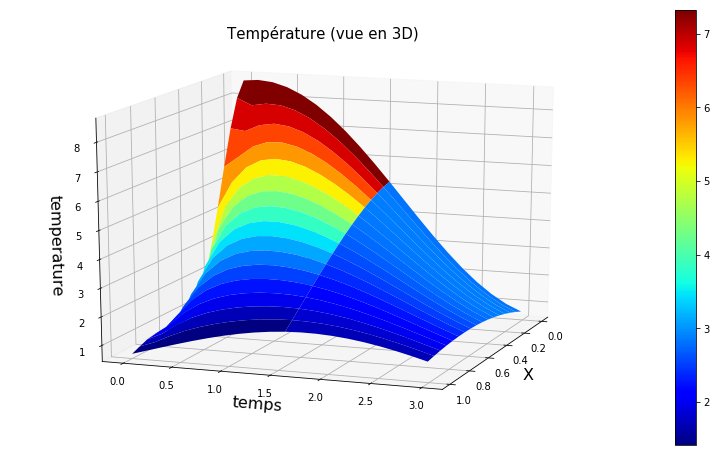

In [211]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize = 16)
ax.set_ylabel('temps', fontsize = 16)
ax.set_zlabel('temperature', fontsize = 16)
ax.view_init(elev=15, azim = 20)

[SX,ST]=np.meshgrid(x,time)
a = ax.plot_surface(SX,ST,U_tab.T,cstride=1,linewidth=0,cmap='jet')
plt.title("Température (vue en 3D)",fontsize=15)
plt.colorbar(a)
plt.show()